In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import requests

# pd.options.display.mpl_style = 'default'
plt.rcParams['figure.figsize'] = (8, 8)

## Getting the data

In [ ]:
df = pd.DataFrame.from_csv("professors.csv", encoding='utf-8')

In [ ]:
df.head(5)

## Author based Analysis

In [ ]:
# This creates a pivot table with Authors as columns, in order to do some exploratory plots
byyear = df.pivot(index='Age', columns='Name', values='Current_Citations')
byyear

In [83]:
# We will now check the "predictability" of the citation values.
# The Hurst exponent is 0 for mean reverting time series
# The exponent is close to 1 for "persistent" time series

from numpy import cumsum, log, polyfit, sqrt, std, subtract
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    ts = [t for t in ts if ~np.isnan(t)]
    
    if len(ts)<10:
        return None
    
    # Create the range of lag values
    lags = range(2, min(10, len(ts)-1))

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

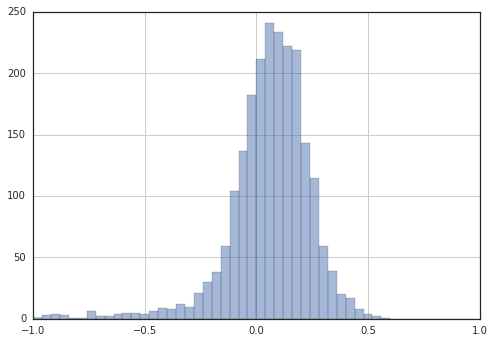

In [91]:
byyear.diff()[1:].apply(hurst).hist(bins=50, range=(-1,1), alpha=0.5)

In [69]:
hurst(ts)

0.87736032937901531

In [5]:
#byyear.plot(legend=False, logy=False, ylim=(0,10000), alpha=0.2)
#byyear.plot(legend=False, logy=True, alpha=0.2)

In [6]:
totals = byyear.cumsum()

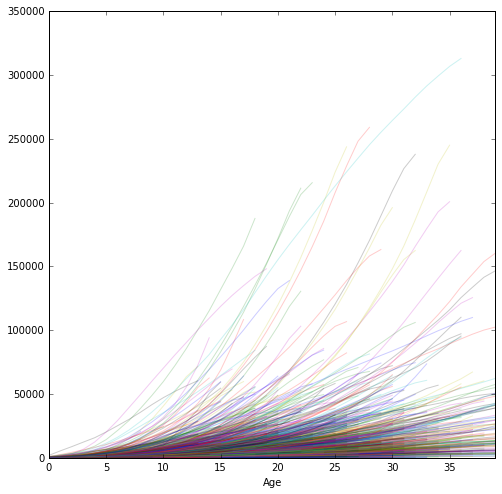

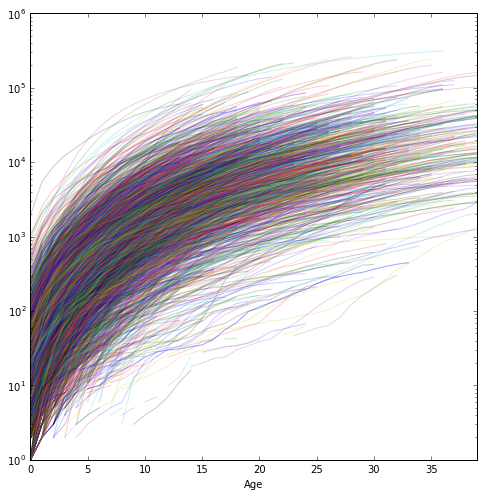

In [7]:
totals.plot(legend=False, logy=False, alpha=0.2)
totals.plot(legend=False, logy=True, alpha=0.2)

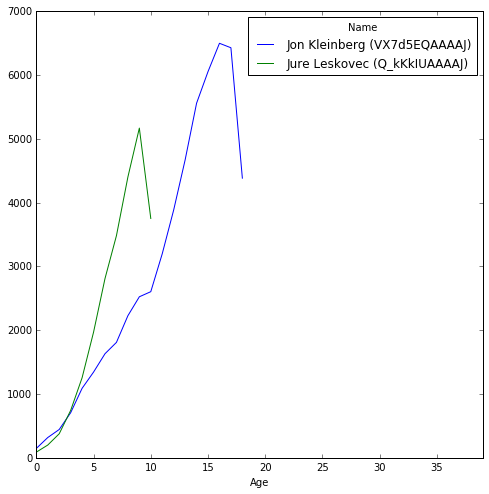

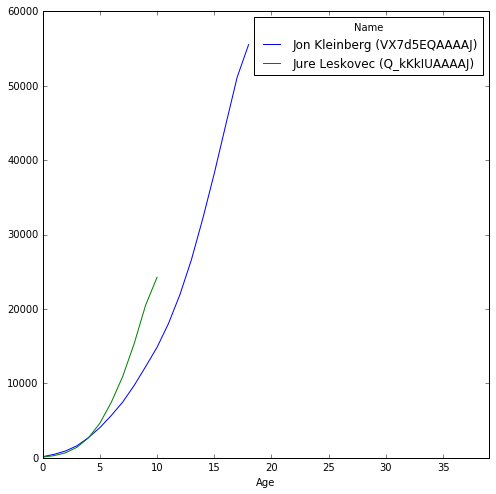

In [8]:
# Let's see the plot of a couple of star researchers
byyear[["Jon Kleinberg (VX7d5EQAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)"]].plot()
totals[["Jon Kleinberg (VX7d5EQAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)"]].plot()

In [9]:
# Let's fine a few more star researchers (getting more than 5000 citations in a year, while being active for less than 10 years)
set(df[df['Current_Citations'] > 5000][df['Age'] < 10]['Name'])

/usr/lib/python3/dist-packages/IPython/kernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from IPython.kernel.zmq import kernelapp as app


{'Andrei Shleifer (BV8WIV8AAAAJ)',
 'Emmanuel Candes (nRQi4O8AAAAJ)',
 'Ernst Fehr (WoSILroAAAAJ)',
 'Hailiang Wang (mIg9II0AAAAJ)',
 'Hongjie Dai, NR (yWdvb8YAAAAJ)',
 'Jure Leskovec (Q_kKkIUAAAAJ)',
 'Matthew Stephens (qOQFhUkAAAAJ)',
 'Michele Limon (23hGvpcAAAAJ)',
 'Patrick O. Brown (XSTsbJ0AAAAJ)',
 'Robert Putnam (Me4t2sQAAAAJ)',
 'Robert Tibshirani (ZpG_cJwAAAAJ)',
 'Sean R. Eddy (rFf-AooAAAAJ)',
 'Tom Maniatis (djRAUcYAAAAJ)',
 'Yi Cui (lNmR2vAAAAAJ)'}

In [10]:
# People with more than 200K citations within 35 years of activity
tt = totals.fillna(method='pad').transpose()
tt[tt[35]>200000]

Age,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Name,,,,,,,,,,,,,,,,,,,,,
Amartya Sen (sLNFo0sAAAAJ),603,1319,2154,2979,3974,5063,6344,7620,8917,10419,...,209166,226701,237943,237943,237943,237943,237943,237943,237943,237943
Andrei Shleifer (BV8WIV8AAAAJ),622,1437,2368,3560,5131,6951,9401,13055,17446,23183,...,215699,215699,215699,215699,215699,215699,215699,215699,215699,215699
Daniel Kahneman (9puL9pAAAAAJ),599,1343,2220,3176,4168,5458,6734,8155,9713,11495,...,148094,165979,186516,208274,230287,245099,245099,245099,245099,245099
Michael E. Porter (g9WIbh0AAAAJ),713,1492,2487,3648,5116,6832,8778,10933,13336,16155,...,259094,259094,259094,259094,259094,259094,259094,259094,259094,259094
Robert Tibshirani (ZpG_cJwAAAAJ),521,1234,2207,3484,4956,6613,8824,11615,15351,20637,...,211389,211389,211389,211389,211389,211389,211389,211389,211389,211389
Ronald C Kessler (EicYvbwAAAAJ),604,1266,1933,2709,3817,5207,6752,8840,11411,14602,...,243822,243822,243822,243822,243822,243822,243822,243822,243822,243822
Tom Maniatis (djRAUcYAAAAJ),884,2173,3479,5204,7804,11451,16141,21804,28511,35896,...,264490,273466,282766,291517,299318,306874,313079,313079,313079,313079


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlogram(corr):
    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,
                square=True, xticklabels=5, yticklabels=5,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

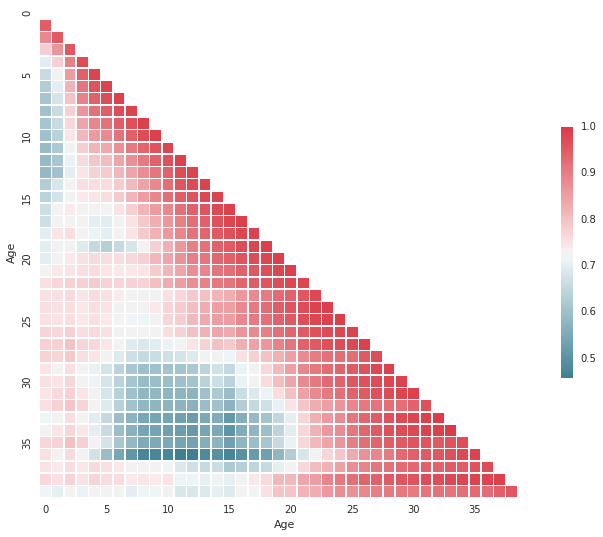

In [12]:
sns.set(style="white")
correlogram = byyear.transpose().corr()
plot_correlogram(correlogram)

## Quantile Analysis

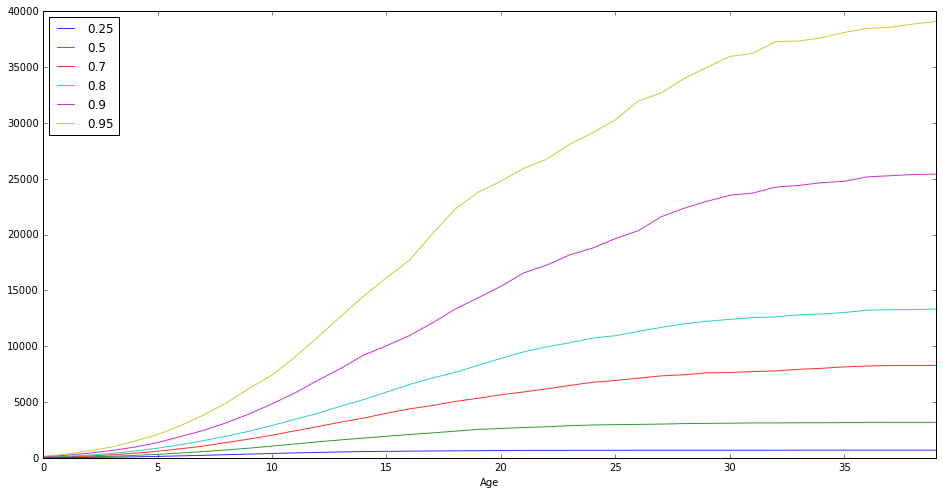

In [24]:
byyear_sum = totals.fillna(method='pad').transpose()

quantiles = [0.25, 0.5, 0.7, 0.8, 0.9, 0.95]
byyear_sum.quantile(quantiles).transpose().plot(logy=False, alpha=0.8,figsize = (16,8))

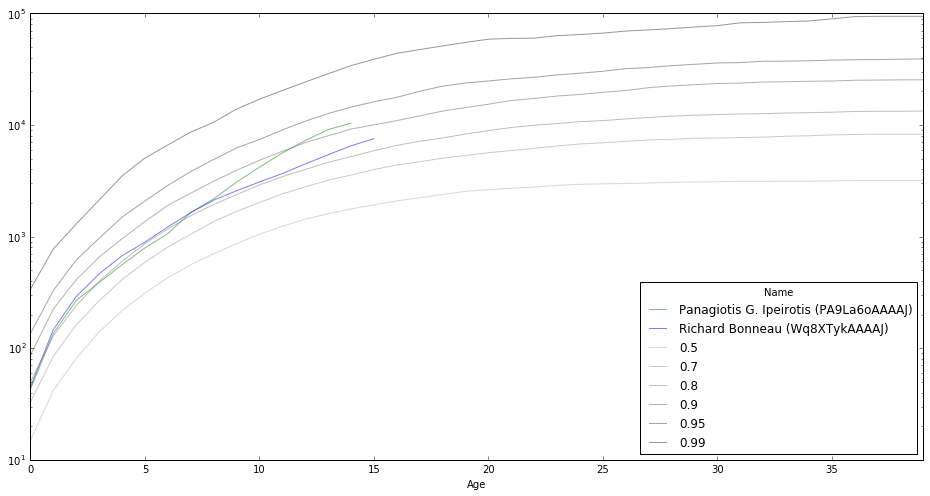

In [26]:
p = byyear[["Panagiotis G. Ipeirotis (PA9La6oAAAAJ)", "Richard Bonneau (Wq8XTykAAAAJ)"]].cumsum()
# "Jon Kleinberg (VX7d5EQAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)", 

quantiles = [0.5, 0.7, 0.8, 0.9, 0.95, 0.99]
q = byyear_sum.quantile(quantiles).transpose()
m = pd.merge(p, q, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False,)
m.plot(figsize = (16,8), legend=True, logy=True, color=['g','b','0.7','0.6','0.5','0.4','0.3','0.2','0.1'], alpha=0.5)

## Comparative performance ranking

In [27]:
rank = byyear.rank(axis=1, pct=True)
rank.T

Age,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Name,,,,,,,,,,,,,,,,,,,,,
"""Adam Buchwald"" (XpEr2UEAAAAJ)",0.234533,0.075143,0.083333,0.139643,0.104980,0.042228,0.097684,0.068147,0.099433,0.104078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.-H. Alissa Park (jaoxVkQAAAAJ),0.307410,0.182568,0.238758,0.271250,0.266571,0.245905,0.254202,0.244015,0.293844,0.294393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AYMEN AWAD ALIAN (zB1r700AAAAJ),0.117616,0.103838,0.101356,0.160179,0.321390,0.200036,0.131304,0.166602,0.178412,0.146347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Andalman (XmOXc8S6gUsC),0.415414,0.425933,0.358315,0.382857,0.377105,0.463051,0.411842,0.389382,0.603888,0.672897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Chatterji (eKqVx84AAAAJ),0.364907,0.396700,0.523911,0.613214,0.671802,0.667455,0.718528,0.702703,0.705549,0.699235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron D. Gitler (-LPp6oUAAAAJ),0.658686,0.815280,0.827445,0.792500,0.817986,0.820349,0.789503,0.828378,0.874848,0.885302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gerow (oo1jM2YAAAAJ),0.181580,0.075143,0.027659,0.110714,0.142422,0.076265,0.102540,0.082432,0.026529,0.038870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron M Newman (gODP8bYAAAAJ),0.234533,0.412841,0.592256,0.569107,0.629165,0.675100,0.813971,0.777027,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron M. Lindenberg (VWIT1GwAAAAJ),0.533729,0.447812,0.760350,0.349821,0.266571,0.433564,0.449010,0.538417,0.437019,0.426508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


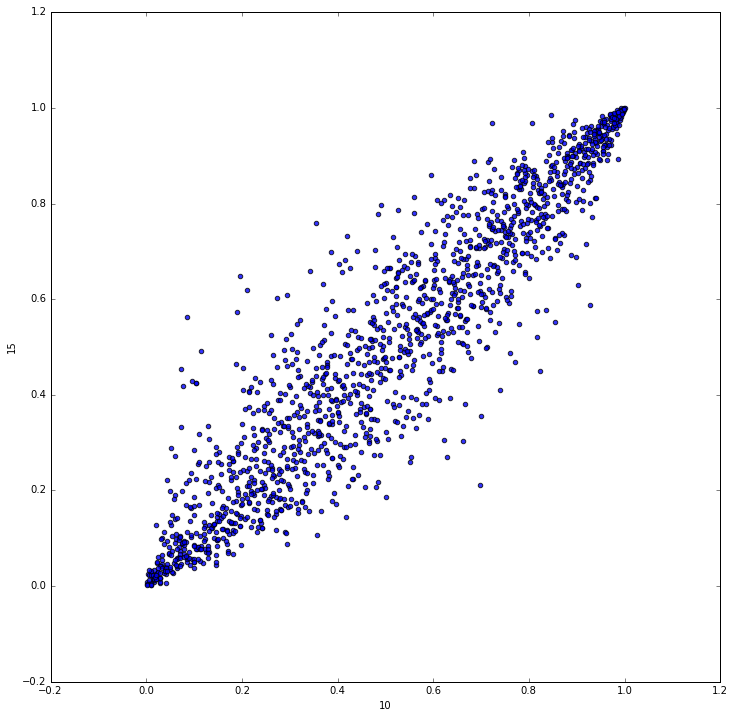

In [14]:
rank.T.plot.scatter(x=rank.T.columns[10], y=rank.T.columns[15],figsize = (12,12),alpha=0.8,)

In [15]:
from pandas.tools.plotting import scatter_matrix

# scatter_matrix(rank.T, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [33]:
import numpy as np
from scipy import stats
# Pretty much copy and paste from
# http://stackoverflow.com/questions/17822282/integrate-2d-kernel-density-estimate
# http://www.ster.kuleuven.be/~pieterd/python/html/core/scipystats.html
# http://stackoverflow.com/questions/30145957/plotting-2d-kernel-density-estimation-with-python

def scatterYoY(x, y, ax):

    # Remove the NaN values
    clean_x = []
    clean_y = []
    for i in range( len(x) ):
        if not(np.isnan(x[i])) and not(np.isnan(y[i])):
            clean_x.append(x[i])
            clean_y.append(y[i])

    # Creating a grid, with 100 steps in each axis
    min_x = min(clean_x) 
    max_x = max(clean_x)
    min_y = min(clean_y)
    max_y = max(clean_y)
    X, Y = np.mgrid[min_x:max_x:100j, min_y:max_y:100j]
    grid = np.vstack([X.ravel(), Y.ravel()])

    # Estimate the 2d-density of the data
    data = np.vstack([clean_x, clean_y])
    density = stats.gaussian_kde(data)
    Z = density(grid)
    Z = np.reshape(Z, X.shape)

    
    #fig = plt.figure(figsize=(12,12))
    #ax = fig.gca()
    ax.set_xlim([min_x,max_x])
    ax.set_ylim([min_y,max_y])

    ax.set_xlabel('Rank at year '+str(y1))
    ax.set_ylabel('Rank at year '+str(y2))

    # Plot the density
    # ax.imshow(np.rot90(Z), cmap=plt.cm.Blues, extent=[min_x,max_x,min_y,max_y])
    # Plot filled-in contour plot
    cfset = ax.contourf(X,Y,Z, cmap='Blues', alpha=0.9)
    # Plot the contour lines in black color
    cset = ax.contour(X,Y,Z, alpha=0.75, colors='k')
    # Add labels  in the contour lines
    ax.clabel(cset, inline=1, fontsize=10, alpha=0.75)
    # Plot the data points
    ax.scatter(clean_x, clean_y, c='b', s=20, alpha=0.1 )




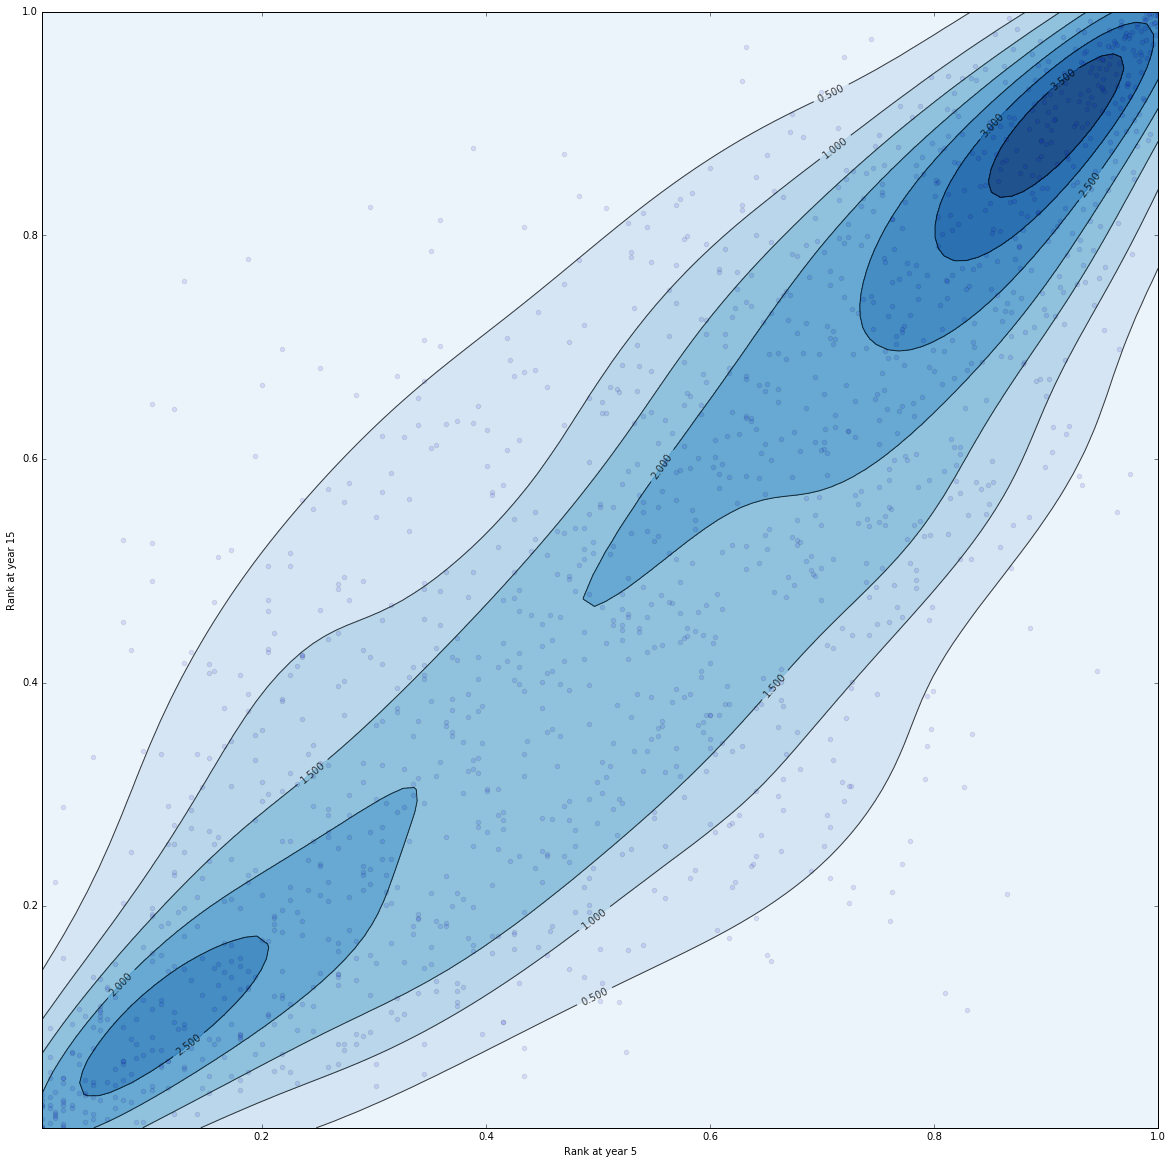

In [34]:
# Year 1 and Year 2 to compare
y1=5
y2=15

x = rank.T[rank.T.columns[y1]].tolist()
y = rank.T[rank.T.columns[y2]].tolist()

fig = plt.figure(figsize=(20,20))
ax = fig.gca()
scatterYoY(x, y, ax)

plt.show()

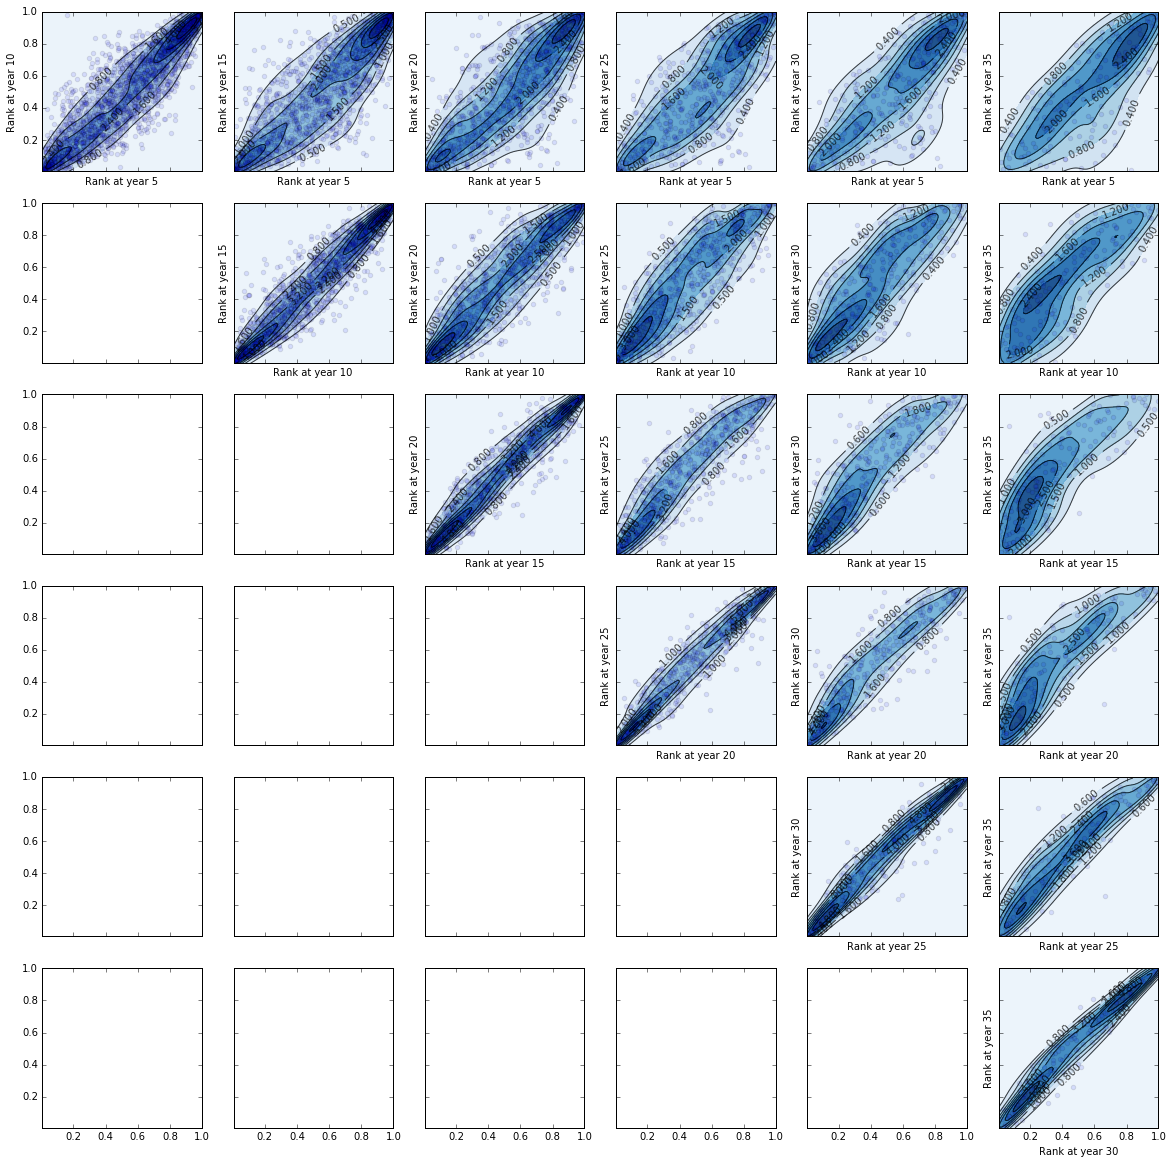

In [18]:
fig, axes = plt.subplots(nrows=6, ncols=6, sharex=True, sharey=True, figsize=(20,20))
for y1 in range(5,36,5):
    for y2 in range (y1,36,5):
        if (y1==y2):
            continue
        # Get the rank values for the two years
        x = rank.T[rank.T.columns[y1]].tolist()
        y = rank.T[rank.T.columns[y2]].tolist()
        
        scatterYoY(x, y, axes[y1/5-1, y2/5-2])


plt.show()

### Compare Ranks of Researchers over Time

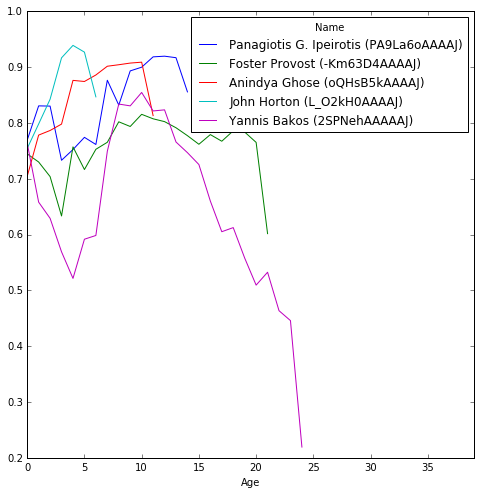

In [42]:
compare = [
    # "Viral Acharya (iZAsYLgAAAAJ)",
    # "Sinan Aral (E2uuNVoAAAAJ)",
    # "Natalia Levina (ApxF7d8AAAAJ)",
    # "Andrei Shleifer (BV8WIV8AAAAJ)",
    # "Jon Kleinberg (VX7d5EQAAAAJ)", 
    # "Jure Leskovec (Q_kKkIUAAAAJ)", 
    "Panagiotis G. Ipeirotis (PA9La6oAAAAJ)",
    # "Claudio T. Silva (YIwiAAsAAAAJ)",
    # "Alexander Tuzhilin (vs4zs0cAAAAJ)",
    # "Mor Naaman (IeqjwlIAAAAJ)",
    "Foster Provost (-Km63D4AAAAJ)",
    "Anindya Ghose (oQHsB5kAAAAJ)",
    # "John P. Dickerson (QgDpfCQAAAAJ)",
    #"Richard Bonneau (Wq8XTykAAAAJ)"
    # "Lasse Heje Pedersen (XhSFeucAAAAJ)",
    # "David Rand (C0ANojIAAAAJ)",
    "John Horton (L_O2kH0AAAAJ)",
    # "andrew Y ng (JgDKULMAAAAJ)"
    # "Prasanna Tambe (UXmpersAAAAJ)",
    # "Arun Sundararajan (M0OB5XQAAAAJ)",
    # "Kristina McElheran (Xjg_fR4AAAAJ)",
    # "Xinxin Li (Knp-_9wAAAAJ)",
    # "Kannan Karhik (E0ihamsAAAAJ)",
    # "Evangelos E. Papalexakis (2P1kinAAAAAJ)",
    # "Alex Beutel (zEYMVR0AAAAJ)",
    # "Patrick O Perry (JyABkTwAAAAJ)",
    # "Arash Asadpour (d770Dd4AAAAJ)",
    "Yannis Bakos (2SPNehAAAAAJ)"
]

rank[compare].plot()

In [ ]:
corr = rank.transpose().corr()
corr

In [ ]:
sns.set(style="white")
correlogram = rank.transpose().corr()
plot_correlogram(correlogram)


## Average Career Ranking

In [ ]:
leaderboard = rank.mean(axis=0, skipna=True).sort_values(ascending =False)
leaderboard.head(50)

In [ ]:
print leaderboard["Panagiotis G. Ipeirotis (PA9La6oAAAAJ)"]

In [ ]:
career_length = byyear.count(axis=0)
report = pd.merge (pd.DataFrame(leaderboard), pd.DataFrame(career_length),left_index=True, right_index=True, sort=True, copy=True, how='inner')
report.sort_values(by='0_x', ascending =False)[report['0_y']<=10]